# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data = "output_data/cities.csv"



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | margate
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | santa rosa
Processing Record 6 of Set 1 | banff
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | palma
Processing Record 9 of Set 1 | klaeng
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | yeniseysk
Processing Record 15 of Set 1 | ksenyevka
City not found. Skipping...
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | glendive
Processing Record 18 of Set 1 | linxia
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | touros
Processing Record 23 of Set 

Processing Record 36 of Set 4 | albany
Processing Record 37 of Set 4 | anadyr
Processing Record 38 of Set 4 | kushima
Processing Record 39 of Set 4 | saint-prosper
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | port hardy
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | kutum
Processing Record 46 of Set 4 | rovaniemi
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | sipovo
Processing Record 0 of Set 5 | alotau
City not found. Skipping...
Processing Record 1 of Set 5 | toora-khem
Processing Record 2 of Set 5 | tasiilaq
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | sterling
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | chagda
City not found. Skipping...
Processing Record 7 of Set 5 | visnes


Processing Record 24 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 25 of Set 8 | buala
Processing Record 26 of Set 8 | portimao
Processing Record 27 of Set 8 | burnie
Processing Record 28 of Set 8 | kavieng
Processing Record 29 of Set 8 | esso
Processing Record 30 of Set 8 | atherton
Processing Record 31 of Set 8 | esperance
Processing Record 32 of Set 8 | tuatapere
Processing Record 33 of Set 8 | hirara
Processing Record 34 of Set 8 | slave lake
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | kaitangata
Processing Record 37 of Set 8 | sinegorye
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | poum
Processing Record 40 of Set 8 | kyzyl-suu
Processing Record 41 of Set 8 | zhezkazgan
Processing Record 42 of Set 8 | molchanovo
Processing Record 43 of Set 8 | nedjo
Processing Record 44 of Set 8 | chicama
Processing Record 45 of Set 8 | hami
Processing Record 46 of Set 8 | carballo
Processing Record 47 of Set 8 

Processing Record 10 of Set 12 | kazanskoye
Processing Record 11 of Set 12 | chifeng
Processing Record 12 of Set 12 | acapulco
Processing Record 13 of Set 12 | plyussa
Processing Record 14 of Set 12 | ambon
Processing Record 15 of Set 12 | santa isabel do rio negro
Processing Record 16 of Set 12 | naryan-mar
Processing Record 17 of Set 12 | tapes
Processing Record 18 of Set 12 | baykit
Processing Record 19 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 12 | labrea
Processing Record 21 of Set 12 | san juan bautista
Processing Record 22 of Set 12 | inirida
Processing Record 23 of Set 12 | severomorsk
Processing Record 24 of Set 12 | jodar
Processing Record 25 of Set 12 | ntoum
Processing Record 26 of Set 12 | tandil
Processing Record 27 of Set 12 | kjopsvik
Processing Record 28 of Set 12 | moctezuma
Processing Record 29 of Set 12 | san luis
Processing Record 30 of Set 12 | araouane
Processing Record 31 of Set 12 | preobrazheniye
Processing Record 32 of Set 1

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,29.71,93,100,8.05,US,1669681487
1,castro,-24.7911,-50.0119,58.93,98,97,11.90,BR,1669681488
2,margate,51.3813,1.3862,45.30,94,67,1.01,GB,1669681488
3,khatanga,71.9667,102.5000,-9.26,98,100,10.47,RU,1669681489
4,santa rosa,14.3122,121.1114,86.09,75,31,9.62,PH,1669681355


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,29.71,93,100,8.05,US,1669681487
1,castro,-24.7911,-50.0119,58.93,98,97,11.90,BR,1669681488
2,margate,51.3813,1.3862,45.30,94,67,1.01,GB,1669681488
3,khatanga,71.9667,102.5000,-9.26,98,100,10.47,RU,1669681489
4,santa rosa,14.3122,121.1114,86.09,75,31,9.62,PH,1669681355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

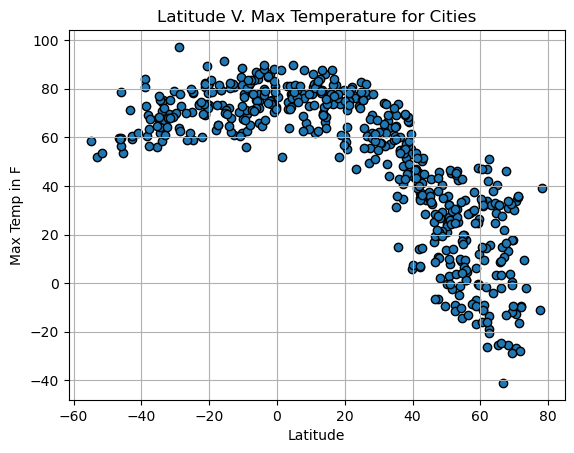

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Max Temperature for Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

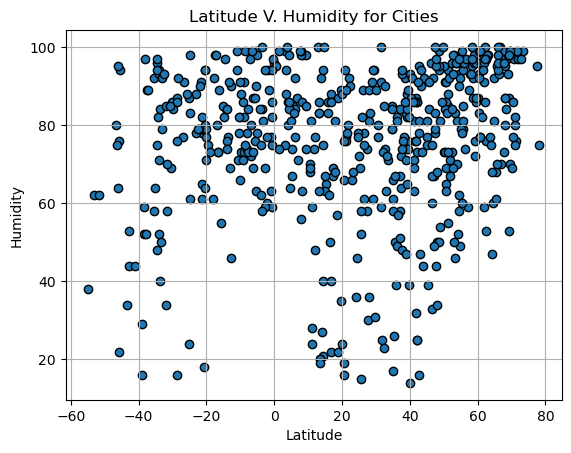

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Humidity for Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

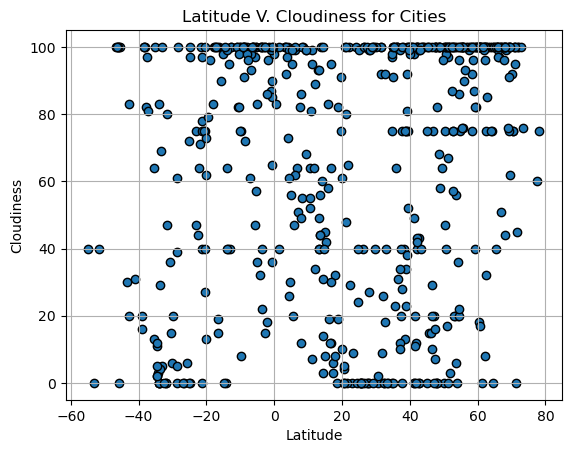

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Cloudiness for Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

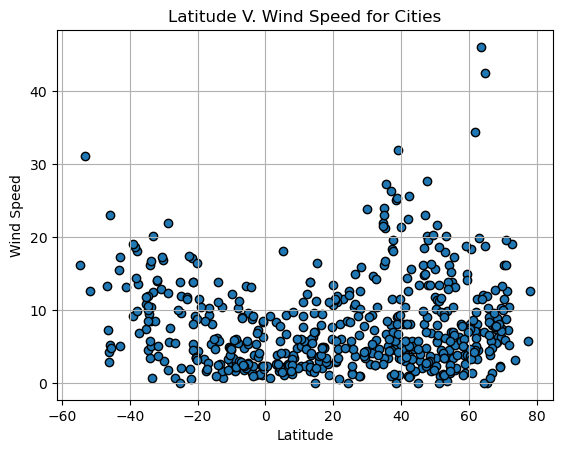

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Wind Speed for Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,29.71,93,100,8.05,US,1669681487
2,margate,51.3813,1.3862,45.30,94,67,1.01,GB,1669681488
3,khatanga,71.9667,102.5000,-9.26,98,100,10.47,RU,1669681489
4,santa rosa,14.3122,121.1114,86.09,75,31,9.62,PH,1669681355
5,banff,51.1762,-115.5698,7.83,85,97,0.00,CA,1669681639


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castro,-24.7911,-50.0119,58.93,98,97,11.90,BR,1669681488
10,saint-philippe,-21.3585,55.7679,69.39,82,78,5.37,RE,1669681717
18,punta arenas,-53.1500,-70.9167,51.91,62,0,31.07,CL,1669681870
20,touros,-5.1989,-35.4608,77.92,78,36,9.57,BR,1669681946
21,vaini,-21.2000,-175.2000,82.56,78,40,13.80,TO,1669681947


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8344221977671141


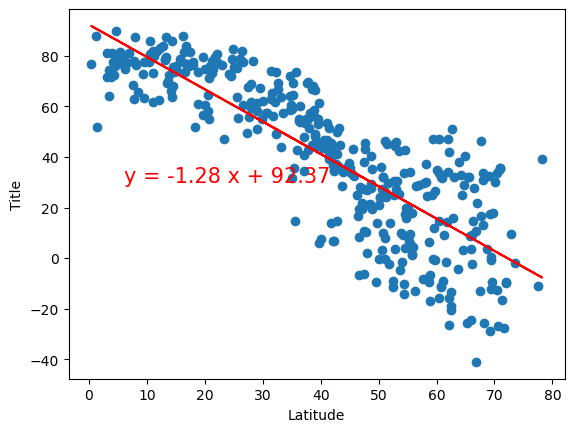

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.5095950511851699


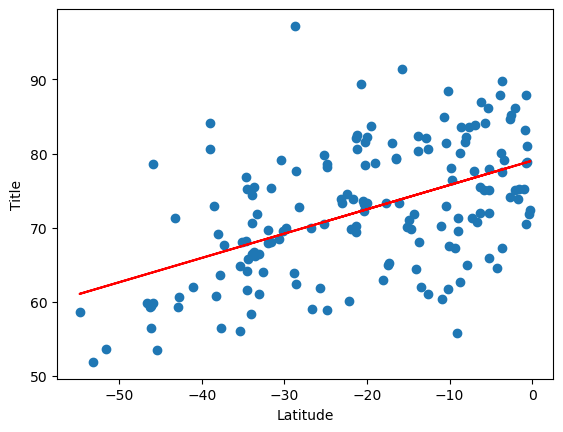

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** There is a strong negative relationship between the temperature and latitude for the Northern Hemisphere. For the Southern Hemisphere, there is a moderately positive relationship between the temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2558527259201608


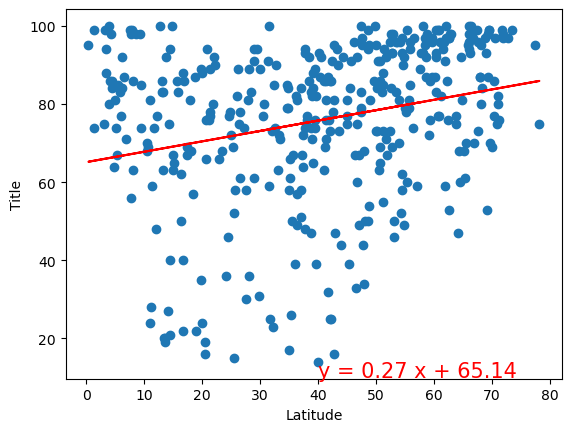

In [33]:
# Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.30520673023951717


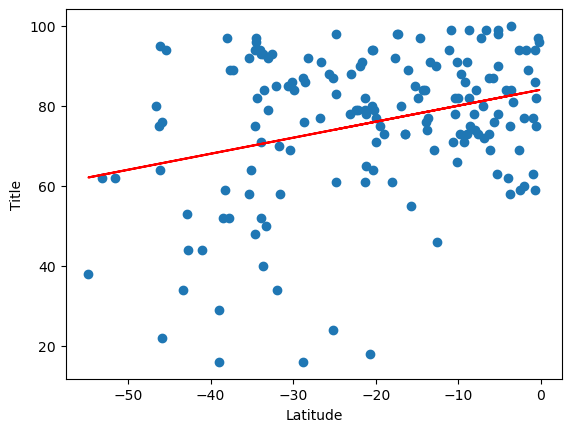

In [34]:
# Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** There is a weak positive relationship between the humidity and latitude for the Northern Hemisphere. For the Southern Hemisphere, there is a weak positive relationship between the humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2565196654525462


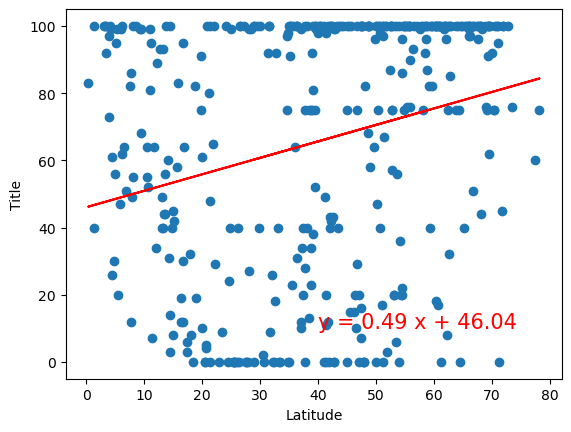

In [39]:
# Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.3761585946781642


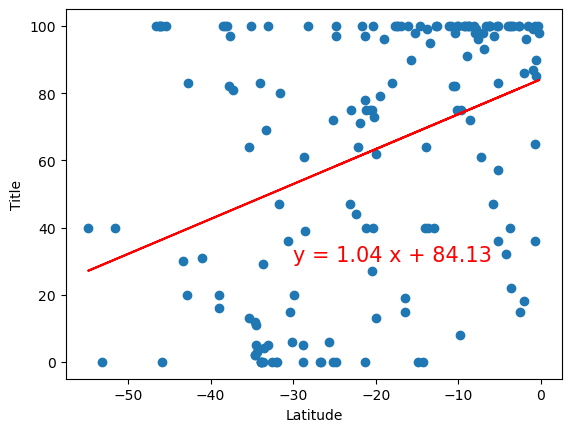

In [36]:
# Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** There is a weak positive relationship between the cloudiness and latitude for the Northern Hemisphere. For the Southern Hemisphere, there is a weak positive relationship between the cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.1798411194011139


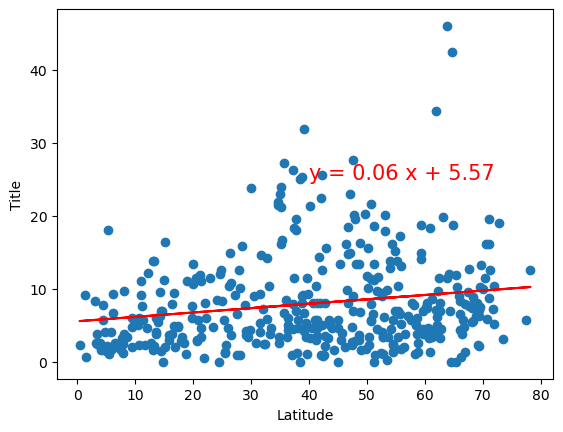

In [37]:
# Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.5051929757747532


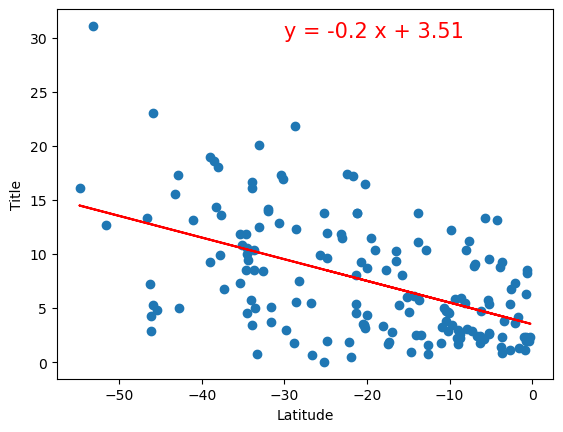

In [38]:
# Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** There is a weak positive relationship between the wind speed and latitude for the Northern Hemisphere. For the Southern Hemisphere, there is a moderately negative relationship between the wind speed and latitude.